<br><h1> RED WINE QUALITY ANALYSIS</h1>
<br><center>Dana Hassanein, M1 IoT</center>
<br><br><br>

In this notebook, first we will analyze the "Red Wine Quality" dataset and we will be doing some exploratory data analysis to have a better understanding of the data we are working with. We will be using matplotlib and seaborn. Then, we will apply different clustering techniques to the dataset to try uncover possible clusters. Finally, we will use different classifier models to predict the quality of the wine.

1. Description of the dataset<br>
2. Data visualization<br>
3. Data pre-processing<br>
4. Clustering : <br>
        A) K-Means (centriod based)
        B) Hierarchical Agglomerative Clustering (similarity based)
        C) Dbscan (density based)
5. Classification : <br>
        A) Random Forest Classifier
        B) SVM Classifier


<br><h4>1. DESCRIPTION OF THE DATASET</h4>

In [344]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import scipy.cluster.hierarchy as sch
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


#Reading data from CSV file
data = pd.read_csv("C:/Users/I Superman/Desktop/clustering/winequality-red.csv")
data.shape


(1599, 12)

The Red Wine dataset has 1599 rows and 12 columns.

In [345]:
#Check for missing data
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null variables in the dataset.

In [346]:
#Information about the data columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [347]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<br><h4>2. DATA VISUALIZATION</h4>

In [348]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

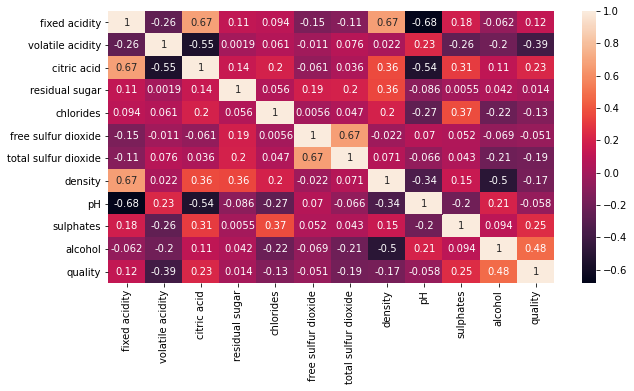

In [349]:
#correlation map
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

Alcohol here has the strongest correlation with wine quality.

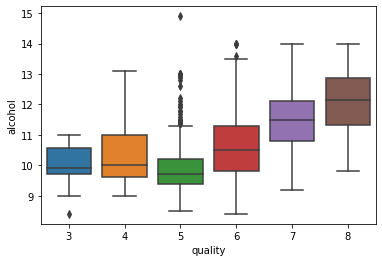

In [350]:
#Boxplot
sns.boxplot('quality', 'alcohol', data = data)

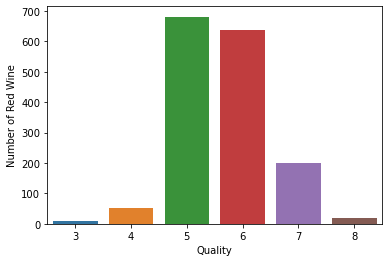

In [351]:
#Distribution of Red Wine quality ratings
sns.countplot(x='quality', data=data)
plt.xlabel("Quality")
plt.ylabel("Number of Red Wine")
plt.show()

<br><h4>3. DATA PRE-PROCESSING</h4>

In [352]:
#create new column "quality_class"
data['quality_class'] = data['quality'].apply(lambda value: 1 if value < 5 else 2 if value < 7 else 3)

In [353]:
#set x and y
x = data.iloc[:,0:11]
y = data['quality_class']

#stadardize data
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

#get feature names
x_columns = data.columns[:11]

#Dimention Reduction : PCA
pca = PCA(n_components=6)
pc_x = pca.fit_transform(x_scaled)
pc_columns = ['pc1','pc2','pc3','pc4','pc5','pc6']

data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


<br><br><center><h1> CLUSTERING </center><br>
- Clustering is an unsupervized learning technique where you take the entire dataset and find the "groups of similar entities" within the dataset. Hence there is no labels within the dataset.
- Useful for organizing very large dataset into meaningful clusters that can be useful and actions can be taken upon. For example, take entire customer base of more than 1M records and try to group into high value customers, low value customers and so on.

<h3>K - MEANS</h3>


The K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster k, and then performs repetitive calculations to optimize the positions of the centroids.
It stops creating and optimizing clusters if:

    - The centroids have stabilized: there is no change in their values because the clustering has been successful.
    - The defined number of iterations has been achieved.
Our goal is to find an optimal number of clusters k.



    ELBOW METHOD :

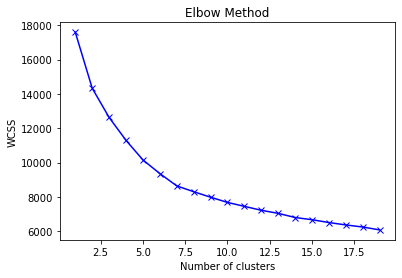

In [354]:
# Determine k

wcss = []
K = range(1, 20)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_scaled)
    wcss.append(kmeanModel.inertia_)
    
    
# Plot the elbow

plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


Judging from the Elbow curve graph, the starting point that forms an elbow around k = 2

In [355]:
# build the model with the output from elbow method which is 2
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(x_scaled)
labels = kmeans.labels_

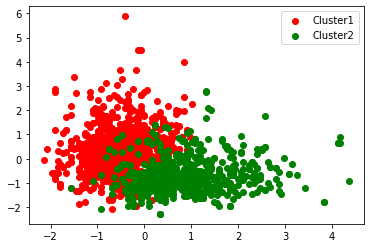

In [356]:
#2D plot
colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(x_scaled[clusters==i,0],
               x_scaled[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

<h5>APPLYING PCA :</h5>

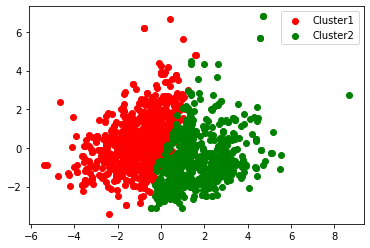

In [357]:
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(pc_x)
labels = kmeans.labels_

colors = 'rgbkcmy'
for i in np.unique(clusters):
    plt.scatter(pc_x[clusters==i,0],
               pc_x[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.legend()

The clustering improved with PCA.

    SILHOUETTE EVALUATION :
The silhouette score ranges from -1 to +1.
Testing With and Without applying PCA.
The higher the silhouette score, the better the clustering.

For n_clusters = 2  :
The average silhouette_score (without PCA) is : 0.21394174587820233
The average silhouette_score (with PCA) is : 0.2455067045056285


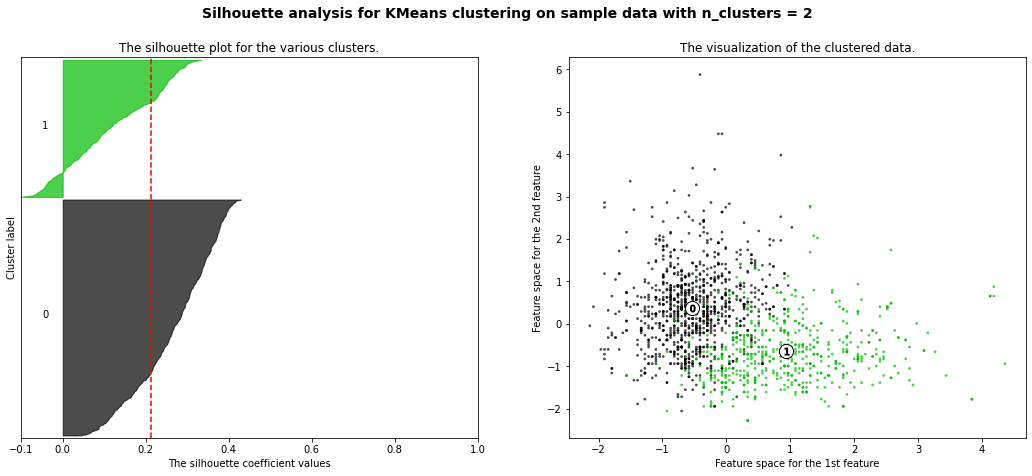

In [358]:
data, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

n_clusters = 2
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

# Initialize the clusterer with n_clusters value and a random generator
# seed of 10 for reproducibility.
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(x_scaled)

# The silhouette_score gives the average value for all the samples.
# This gives a perspective into the density and separation of the formed
# clusters
silhouette_avg = silhouette_score(x_scaled, cluster_labels)
PCA = metrics.silhouette_score(pc_x, labels, metric='euclidean')
print("For n_clusters =", n_clusters, " :")
print("The average silhouette_score (without PCA) is :", silhouette_avg)
print("The average silhouette_score (with PCA) is :", PCA)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(x_scaled[:, 0], x_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

Based on the Silhouette plot, the highest average number of silhouettes is the number of clusters = 2, so k = 2 is the most optimal k.<br>
The silhouette score is higher with PCA, but is still considered low, so clusters are neither dense nor well separated.

In [359]:
#Inirtia value with PCA
kmeans.inertia_

11788.977813144695

We have a very high inertia. And we are using 11 dimensions of data.<br>
So K-means clustering has poor clustering result for high dimensional data. So we can conclude that this is not a good model fit to the data.

<br><h3>AGGLOMERATIVE HIERARCHICAL CLUSTERING</h3>

Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively. The 'AgglomerativeClustering' object performs a hierarchical clustering using a bottom up approach: each observation starts in its own cluster, and clusters are successively merged together. 

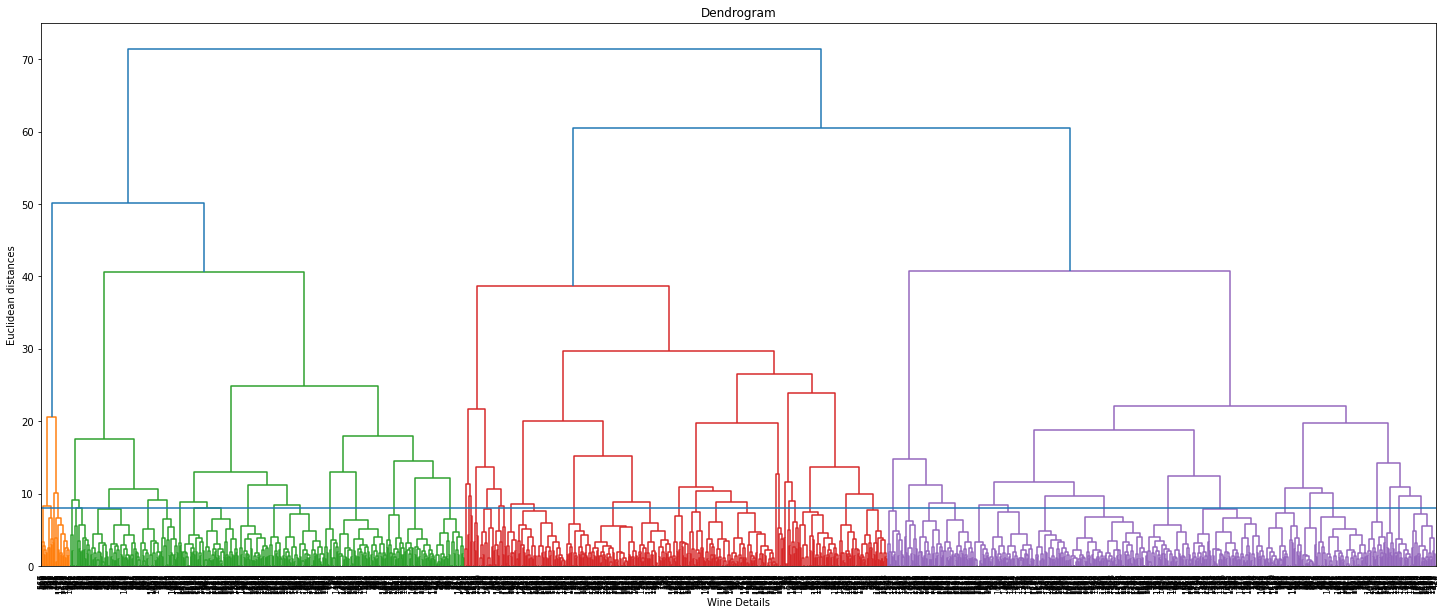

In [360]:
#plot dendrogram to determine number of clusters
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Wine Details')
plt.ylabel('Euclidean distances')

dendrogram (
    linkage(x_scaled, 'ward')  # generate the linkage matrix
    ,leaf_font_size=8 # font size for the x axis labels
)
plt.axhline(y=8)
plt.show()

We can see from the dendrogram that the 3rd branch are similar. It should have are 3 clusters and the distance between the clusters are the highest.

In [361]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3).fit(x_scaled)
clustering

AgglomerativeClustering(n_clusters=3)

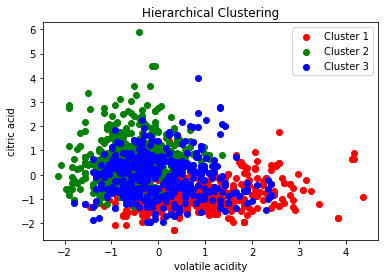

In [362]:
#visualize clustering
colors = 'rgbkcmy'

for i in np.unique(clustering.labels_):
    plt.scatter(x_scaled[clustering.labels_ == i, 0], x_scaled[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))

plt.legend()
plt.title('Hierarchical Clustering')
plt.xlabel(x_columns[1])
plt.ylabel(x_columns[2])
plt.show()

The clusters in the graph are not clear.

In [363]:
# Evaluation
metrics.silhouette_score(x_scaled, clustering.labels_, metric='euclidean')

0.15774678821181679

<h5>APPLYING PCA :</h5>

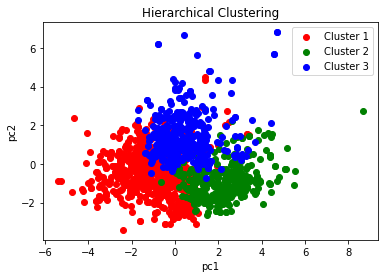

In [364]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=3)
clustering.fit(pc_x)

colors = 'rgbkcmy'
for i in np.unique(clustering.labels_):
    plt.scatter(pc_x[clustering.labels_ == i, 0], 
                pc_x[clustering.labels_ == i, 1],
                color=colors[i], label='Cluster ' + str(i + 1))

plt.legend()

plt.title('Hierarchical Clustering')
plt.xlabel(pc_columns[0])
plt.ylabel(pc_columns[1])
plt.show()

The clustering improved with PCA.

In [365]:
# Evaluation
metrics.silhouette_score(pc_x, clustering.labels_, metric='euclidean')

0.1602723362600377

<br><h3> DBSCAN</h3>

Density-Based Spatial Clustering of Applications with Noise is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together, marking as outliers points that lie alone in low-density region. The DBSCAN algorithm should be used to find associations and structures in data that are hard to find manually but that can be relevant and useful to find patterns and predict trends.

In [366]:
#Higher density necessary to form a cluster.
dbscan = DBSCAN(eps=2, min_samples=7)
clusters= dbscan.fit_predict(x_scaled)

np.unique(clusters)

array([-1,  0,  1], dtype=int64)

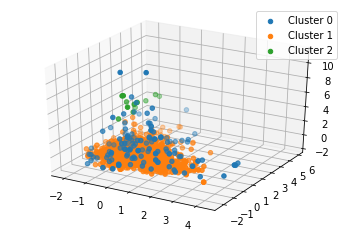

In [367]:
#visualize clustering 3D
colors = 'rgbkcmy'
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Cluster 0' if i == -1 else 'Cluster ' + str(i + 1)
    ax.scatter3D(x_scaled[clusters==i,0], x_scaled[clusters==i,1],x_scaled[clusters==i,4],
                #color=colors[i], 
                 label=label)

plt.legend()
plt.show()

In [368]:
# Evaluation
labels = dbscan.labels_
metrics.silhouette_score(x_scaled, labels, metric='euclidean')

0.3437490618337053

<h5>APPLYING PCA :</h5>

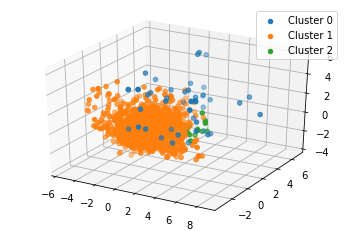

In [369]:
dbscan = DBSCAN(eps=2, min_samples=7)
clusters= dbscan.fit_predict(pc_x)

np.unique(clusters)

ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Cluster 0' if i == -1 else 'Cluster ' + str(i + 1)
    ax.scatter3D(pc_x[clusters==i,0], 
                 pc_x[clusters==i,1],
                 pc_x[clusters==i,2],
                 label=label)

plt.legend()
plt.show()

In [370]:
# Evaluation
labels = dbscan.labels_
metrics.silhouette_score(pc_x, labels, metric='euclidean')

0.463939257352788

<br><br><center> <h1> CLASSIFICATION </h1></center><br>

Support vector machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. The advantages of SVM are:<br>
- Effective in high dimensional spaces.
- Still effective in cases where number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.


For classification of Red Wine Quality, we will create a new column called 'Scores'.<br>
This column will contain 1, 2 and 3:

    1 : Bad quality score (1 - 3)
    2 : Average quality score (4 - 7)
    3 : Good quality score (8 - 10)

In [429]:
df =  pd.read_csv("C:/Users/I Superman/Desktop/clustering/winequality-red.csv")

reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

x = df.iloc[:,:11]
y = df['Reviews']

sc = StandardScaler()
x = sc.fit_transform(x)

In [430]:
# Split the data into train and test :

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pc_x, y)

    1. Random Forest Classifier :

In [431]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_predict=rf.predict(x_test)

In [432]:
#print accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[  0   3   0]
 [  0 393   1]
 [  0   2   1]]
98.5


    2. SVM Classifier :

In [433]:
from sklearn.svm import SVC

#First use rbf kernel to check accuracy
lin_svc = SVC()
lin_svc.fit(x_train, y_train)
lin_svc=rf.predict(x_test)

#print accuracy score
lin_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
lin_svc_acc_score = accuracy_score(y_test, rf_predict)
print(lin_svc_conf_matrix)
print(lin_svc_acc_score*100)

[[  0   3   0]
 [  0 393   1]
 [  0   2   1]]
98.5


RBF Kernel: 98.5% accuracy. It is the same accurary as Random Forest.

In [434]:
#Linear kernel
rbf_svc = SVC(kernel='linear')
rbf_svc.fit(x_train, y_train)
rbf_svc=rf.predict(x_test)

In [435]:
rbf_svc_conf_matrix = confusion_matrix(y_test, rf_predict)
rbf_svc_acc_score = accuracy_score(y_test, rf_predict)
print(rbf_svc_conf_matrix)
print(rbf_svc_acc_score*100)

[[  0   3   0]
 [  0 393   1]
 [  0   2   1]]
98.5


The accuracy did not improve, it is the same.
We can conclude that the SVC and the RandomForest give us good prediction accuracy for the Red Wine classification.